In [70]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            precision_score,
                            recall_score,
                            f1_score,
                            mean_squared_error,
                            r2_score,
                            roc_curve,
                            auc)

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier
# 모든 경고 메세지 무시 설정
import warnings
warnings.filterwarnings('ignore')

# dataframe 출력시 최대 50개의 열만 출력
pd.set_option('display.max_columns', 50)

In [71]:
# Read Datasets
audit_risk = pd.read_csv("audit_data.csv")
trial = pd.read_csv("trial.csv")


In [72]:
print("Shape of Audit Risk Data: ",audit_risk.shape)
print("Shape of Trial Data:",trial.shape)

Shape of Audit Risk Data:  (776, 27)
Shape of Trial Data: (776, 18)


In [73]:
# Display Null Values
audit_risk_null_percentage = (audit_risk.isnull().sum() / len(audit_risk) * 100)
trial_null_percentage = (trial.isnull().sum() / len(trial) * 100)
print("Null Values of Audit Data: \n",audit_risk_null_percentage)
print("Null Values of Trial Data: \n",trial_null_percentage)

Null Values of Audit Data: 
 Sector_score      0.000000
LOCATION_ID       0.000000
PARA_A            0.000000
Score_A           0.000000
Risk_A            0.000000
PARA_B            0.000000
Score_B           0.000000
Risk_B            0.000000
TOTAL             0.000000
numbers           0.000000
Score_B.1         0.000000
Risk_C            0.000000
Money_Value       0.128866
Score_MV          0.000000
Risk_D            0.000000
District_Loss     0.000000
PROB              0.000000
RiSk_E            0.000000
History           0.000000
Prob              0.000000
Risk_F            0.000000
Score             0.000000
Inherent_Risk     0.000000
CONTROL_RISK      0.000000
Detection_Risk    0.000000
Audit_Risk        0.000000
Risk              0.000000
dtype: float64
Null Values of Trial Data: 
 Sector_score     0.000000
LOCATION_ID      0.000000
PARA_A           0.000000
SCORE_A          0.000000
PARA_B           0.000000
SCORE_B          0.000000
TOTAL            0.000000
numbers         

In [74]:
# Handling Null Values and Checking Null Values
audit_risk['Money_Value'] = audit_risk['Money_Value'].fillna(audit_risk['Money_Value'].mean())
trial['Money_Value'] = trial['Money_Value'].fillna(trial['Money_Value'].mean())

print("Check Null Values After Filling in Audit Risk Data: \n",audit_risk.isnull().sum())
print("Check Null Values After Filling in Trial Data: \n",trial.isnull().sum())

Check Null Values After Filling in Audit Risk Data: 
 Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64
Check Null Values After Filling in Trial Data: 
 Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dt

In [75]:
# Data Preprocessing
trial.columns = ['Sector_score','LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B',
       'Score_B',  'TOTAL', 'numbers', 'Marks',
       'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk_trial' ]
trial['Score_A'] = trial['Score_A']/10
trial['Score_B'] = trial['Score_B']/10


In [76]:
# Merge Dataframes
same_columns = np.intersect1d(audit_risk.columns, trial.columns)
same_columns

array(['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'],
      dtype=object)

In [77]:
# 외부 조인으로 merge
merged_df = pd.merge(audit_risk, trial, how='outer', on = ['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'])
merged_df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'Marks', 'MONEY_Marks',
       'District', 'Loss', 'LOSS_SCORE', 'History_score', 'Risk_trial'],
      dtype='object')

In [78]:
# Data Cleaning
df = merged_df.drop(['Risk_trial','Detection_Risk', 'Risk_F'], axis = 1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   810 non-null    float64
 1   LOCATION_ID    810 non-null    object 
 2   PARA_A         810 non-null    float64
 3   Score_A        810 non-null    float64
 4   Risk_A         810 non-null    float64
 5   PARA_B         810 non-null    float64
 6   Score_B        810 non-null    float64
 7   Risk_B         810 non-null    float64
 8   TOTAL          810 non-null    float64
 9   numbers        810 non-null    float64
 10  Score_B.1      810 non-null    float64
 11  Risk_C         810 non-null    float64
 12  Money_Value    810 non-null    float64
 13  Score_MV       810 non-null    float64
 14  Risk_D         810 non-null    float64
 15  District_Loss  810 non-null    int64  
 16  PROB           810 non-null    float64
 17  RiSk_E         810 non-null    float64
 18  History   

In [80]:
# Encoding Categorical Data
encoder = LabelEncoder()
df['LOCATION_ID'] = encoder.fit_transform(df['LOCATION_ID'])

<Axes: >

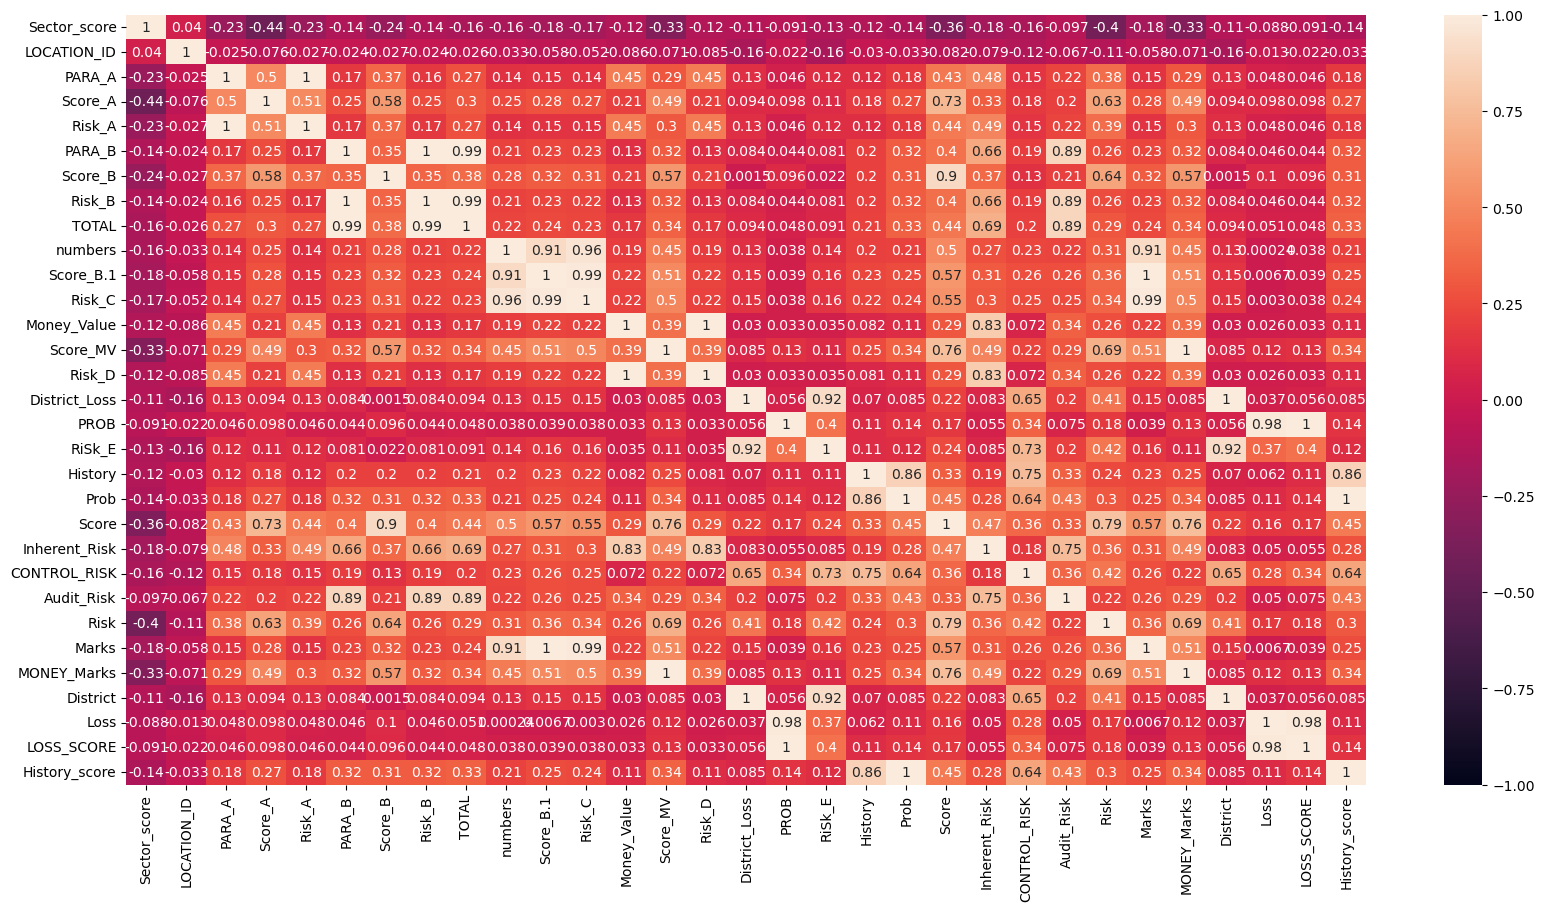

In [81]:
# Correlation Analysis
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)

In [82]:
# Dropping Highly Correlated Variables
# 모델의 과적합(overfitting)과 다중공선성(multicollinearity)을 방지하기 위해, 상관계수가 0.8 이상으로 서로 높은 상관관계를 가지는 변수들 중 일부를 제거
# 타겟 변수와 상관관계가 높고 다른 독립 변수들과는 상관관계가 낮은 열만 남겨서 분석에 활용

df.drop(['Risk_A', 'Risk_B', 'Risk_C', 'Risk_D', 'RiSk_E', 'Prob', 'CONTROL_RISK', 'TOTAL','LOSS_SCORE','PROB','History_score','District_Loss', 'Score_MV','Score_B.1','Audit_Risk','Inherent_Risk'], axis = 1,  inplace=True)

<Axes: >

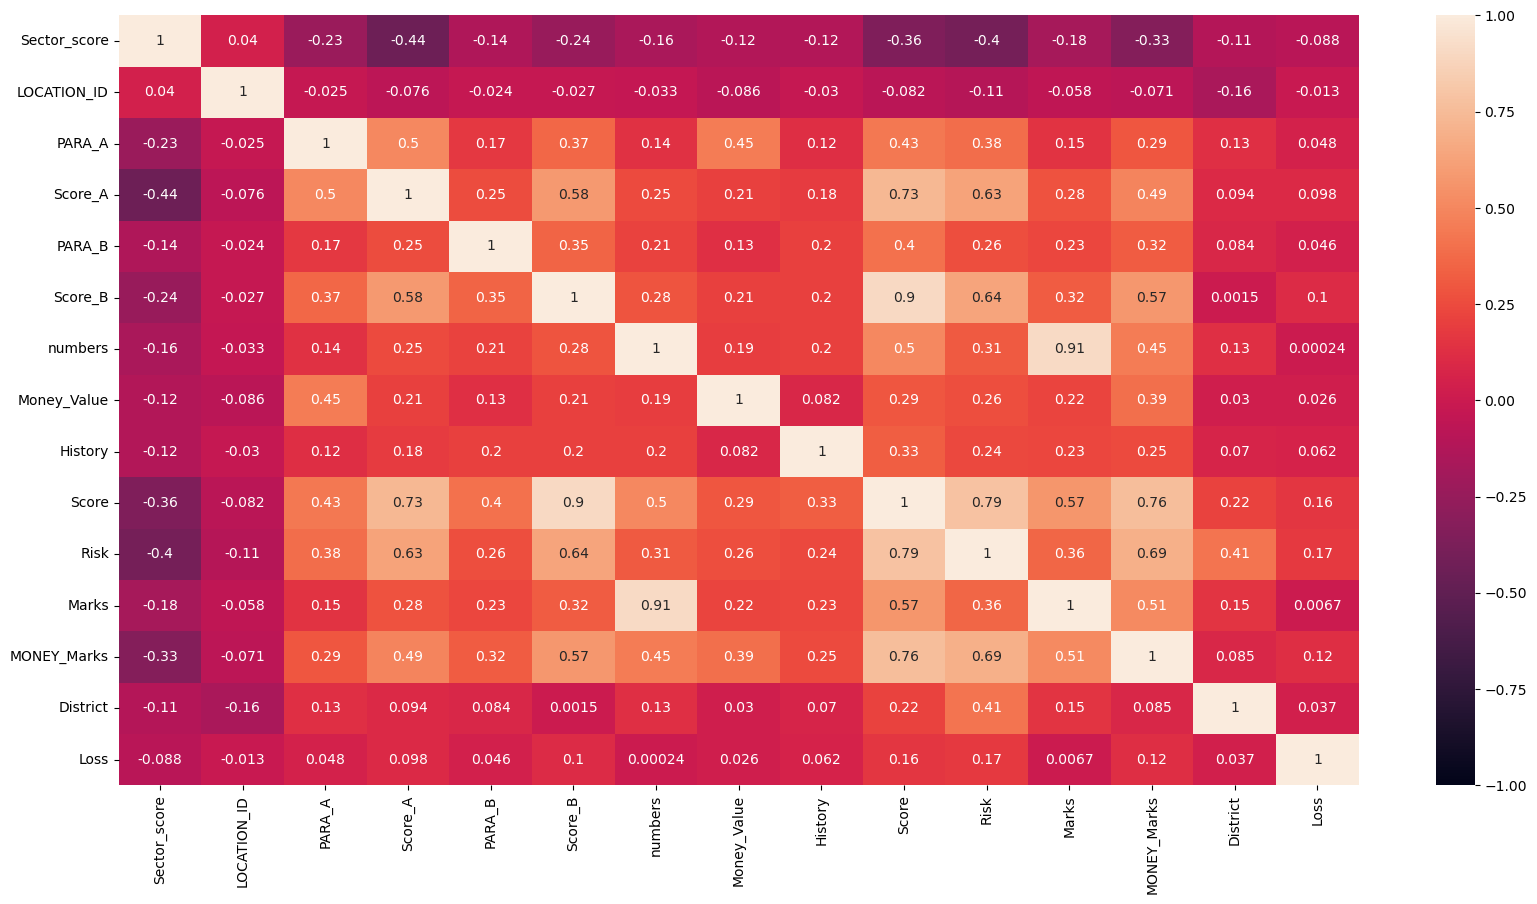

In [83]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)

In [84]:
# 훈련 및 테스트 셋 분할
classification_X = df.drop(['Risk'], axis = 1)
classification_y = df['Risk']
X_train_org, X_test_org, y_train, y_test = train_test_split(classification_X, classification_y, 
                                                            test_size = 0.25, random_state = 0)

In [85]:
# Scaling the Data
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test  = scaler.transform(X_test_org)

(1)3개의 모델(k-Nearest Neighbors, SVM, Decision Tree) 을 각각 Training하고 각 모델의 성능을 평가하세요. 모델 성능 평가 지표는 precision, recall, F1 score를 사용하세요.

In [86]:
# k-Nearest Neighbors Classifier with k-Fold Cross-Validation
knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Accuracy on test set: 0.9359605911330049
Mean cross-validation accuracy: 0.9654274250954508
Mean training accuracy: 0.9762767581105937
Mean precision: 0.9663857418301468
Mean recall: 0.9654274250954508
Mean F1 score: 0.965162969029217


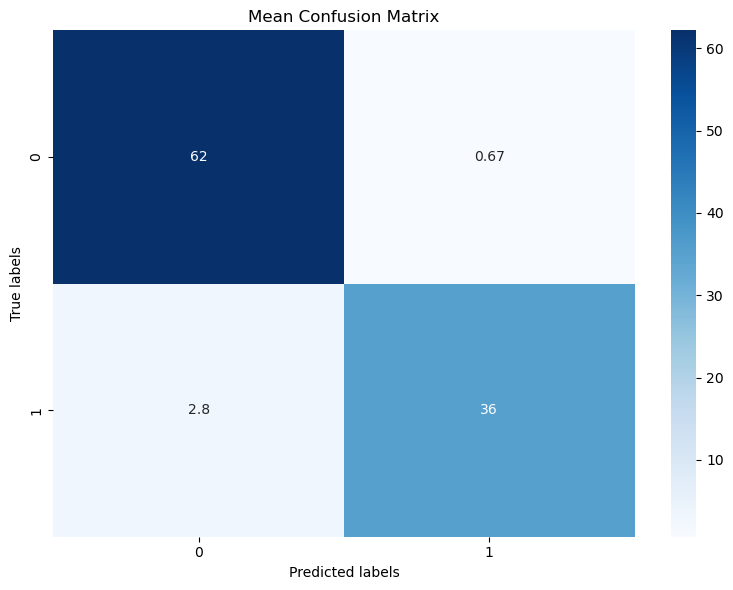

Elapsed time: 0.08851408958435059 seconds


In [87]:
# Evaluating KNN Classifier
y_train = np.array(y_train)

kf = KFold(n_splits=6, shuffle=True, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")

train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1 = []
conf_matrices = []

start_time = time.time()  

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    
    knn.fit(X_train_fold, y_train_fold)
    
    y_val_pred = knn.predict(X_val_fold)
    
    val_accuracy = accuracy_score(y_val_fold, y_val_pred)
    test_accuracy.append(val_accuracy)
    
    y_train_pred = knn.predict(X_train_fold)
    
    train_accuracy.append(accuracy_score(y_train_fold, y_train_pred))
    precision.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1.append(f1_score(y_val_fold, y_val_pred, average='weighted'))
    conf_matrices.append(confusion_matrix(y_val_fold, y_val_pred))

knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
mean_conf_matrix = np.mean(conf_matrices, axis=0)

end_time = time.time()  
elapsed_time = end_time - start_time 


print("Accuracy on test set:", accuracy_score(y_test, y_test_pred))
print("Mean cross-validation accuracy:", np.mean(test_accuracy))
print("Mean training accuracy:", np.mean(train_accuracy))
print("Mean precision:", np.mean(precision))
print("Mean recall:", np.mean(recall))
print("Mean F1 score:", np.mean(f1))

plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix, annot=True, cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Mean Confusion Matrix')

plt.tight_layout()
plt.show()

print("Elapsed time:", elapsed_time, "seconds")

Accuracy on test set: 0.9655172413793104
Mean cross-validation accuracy: 0.9604445738691516
Mean training accuracy: 0.965733312461681
Mean precision: 0.9654689608636978
Mean recall: 0.9321997520168251
Mean F1 score: 0.9476868750469926
Optimal threshold: -0.9895561569519526


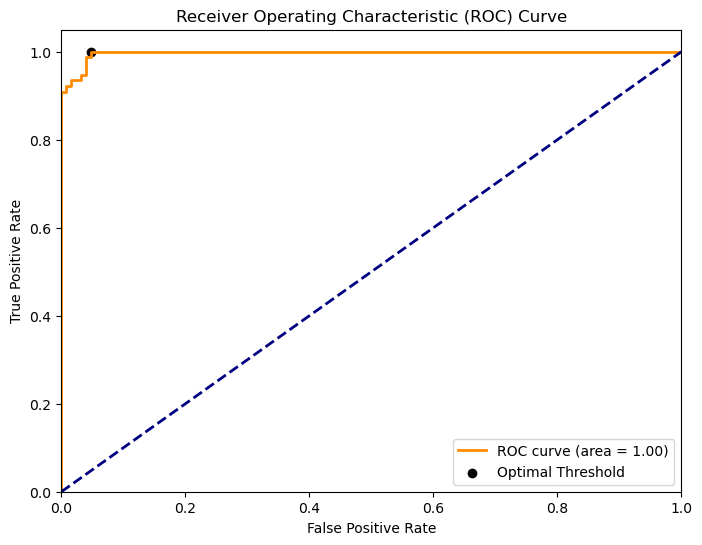

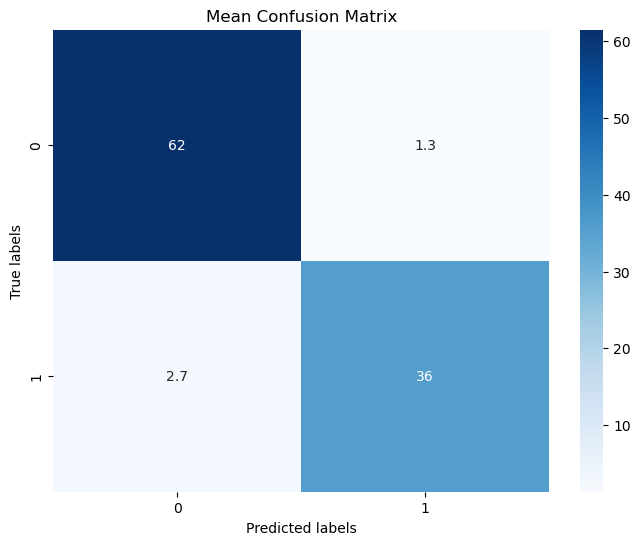

Elapsed time: 0.05559515953063965 seconds


In [88]:
# Training and Evaluating SVM Classifier with k-Fold Cross-Validation
y_train = np.array(y_train)

kf = KFold(n_splits=6, shuffle=True, random_state=42)

svm = SVC(kernel='linear', probability=True)

train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1 = []
conf_matrices = []

start_time = time.time()  

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    
    svm.fit(X_train_fold, y_train_fold)
    
    y_val_pred = svm.predict(X_val_fold)
    
    val_accuracy = np.mean(y_val_pred == y_val_fold)
    test_accuracy.append(val_accuracy)
    
    y_train_pred = svm.predict(X_train_fold)
    
    train_accuracy.append(np.mean(y_train_pred == y_train_fold))
    precision.append(precision_score(y_val_fold, y_val_pred, zero_division=0))
    recall.append(recall_score(y_val_fold, y_val_pred, zero_division=0))
    f1.append(f1_score(y_val_fold, y_val_pred, zero_division=0))
    conf_matrices.append(confusion_matrix(y_val_fold, y_val_pred))

svm.fit(X_train, y_train)
y_test_pred = svm.predict(X_test)
mean_conf_matrix = np.mean(conf_matrices, axis=0)

y_score = svm.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

end_time = time.time()  
elapsed_time = end_time - start_time 

print("Accuracy on test set:", np.mean(y_test_pred == y_test))
print("Mean cross-validation accuracy:", np.mean(test_accuracy))
print("Mean training accuracy:", np.mean(train_accuracy))
print("Mean precision:", np.mean(precision))
print("Mean recall:", np.mean(recall))
print("Mean F1 score:", np.mean(f1))
print("Optimal threshold:", optimal_threshold)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix, annot=True, cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Mean Confusion Matrix')
plt.show()

print("Elapsed time:", elapsed_time, "seconds")

Pre-pruned Decision Tree:
Accuracy on test set: 0.9310344827586207
Mean cross-validation accuracy: 0.9242380120364978
Mean training accuracy: 0.9393769811763785
Mean precision_pre-pruned: 0.9592436974789916
Mean recall_pre-pruned: 0.8401620261376359
Mean F1 score_pre-pruned: 0.8931147944402649

Post-pruned Decision Tree:
Accuracy on test set: 0.9655172413793104
Mean cross-validation accuracy: 0.9736135378243707
Mean training accuracy: 0.9904453488827144
Mean precision_post-pruned: 0.9785874054166737
Mean recall_post-pruned: 0.9519062180647547
Mean F1 score_post-pruned: 0.9646426846178359


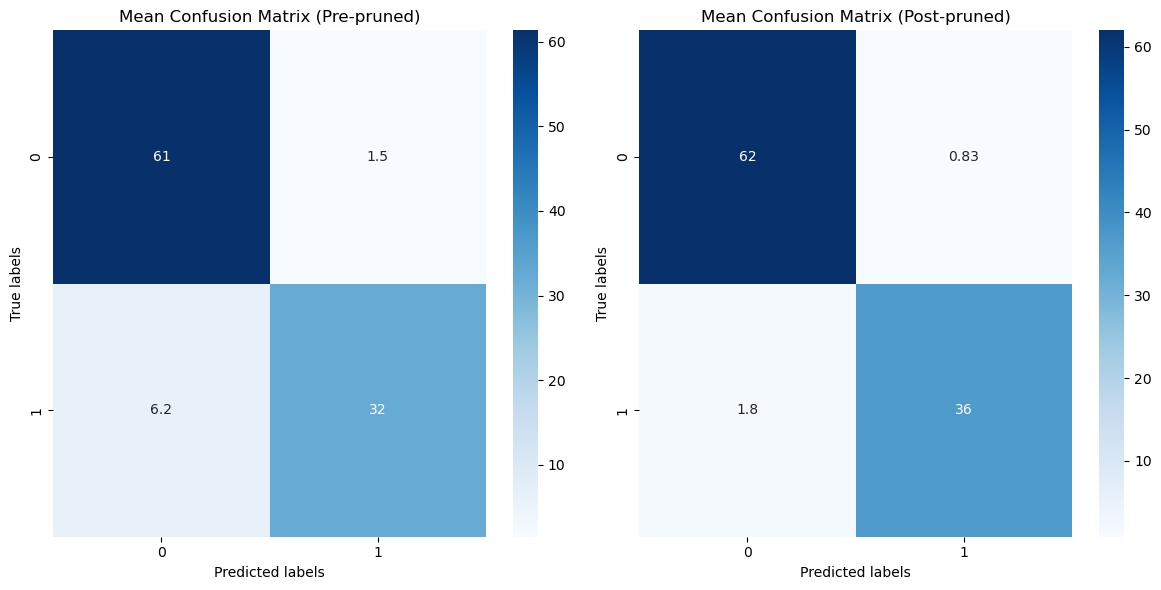

In [89]:
# Training and Evaluating Decision Trees Classifier with k-Fold Cross-Validation
y_train = np.array(y_train)

kf = KFold(n_splits=6, shuffle=True, random_state=42)

pre_pruned_tree = DecisionTreeClassifier(max_depth=3)
post_pruned_tree = DecisionTreeClassifier(max_depth=5)

# metric
train_accuracy_pre_pruned = []
test_accuracy_pre_pruned = []
train_accuracy_post_pruned = []
test_accuracy_post_pruned = []
precision_pre_pruned = []
recall_pre_pruned = []
f1_pre_pruned = []
precision_post_pruned = []
recall_post_pruned = []
f1_post_pruned = []

conf_matrices_pre_pruned = []
conf_matrices_post_pruned = []

for train_index, test_index in kf.split(X_train):
    # train, val data 분할
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    pre_pruned_tree.fit(X_train_fold, y_train_fold)

    # val data metric 계산
    ## max_depth=3인 모델
    y_val_pred_pre_pruned = pre_pruned_tree.predict(X_val_fold)
    val_accuracy_pre_pruned = np.mean(y_val_pred_pre_pruned == y_val_fold)
    test_accuracy_pre_pruned.append(val_accuracy_pre_pruned)
    train_accuracy_pre_pruned.append(np.mean(pre_pruned_tree.predict(X_train_fold) == y_train_fold))
    conf_matrices_pre_pruned.append(confusion_matrix(y_val_fold, y_val_pred_pre_pruned))
    precision_pre_pruned.append(precision_score(y_val_fold, y_val_pred_pre_pruned,zero_division=0))
    recall_pre_pruned.append(recall_score(y_val_fold, y_val_pred_pre_pruned, zero_division=0))
    f1_pre_pruned.append(f1_score(y_val_fold, y_val_pred_pre_pruned, zero_division=0))
    

    # max_depth=5인 모델
    post_pruned_tree.fit(X_train_fold, y_train_fold)
    y_val_pred_post_pruned = post_pruned_tree.predict(X_val_fold)
    val_accuracy_post_pruned = np.mean(y_val_pred_post_pruned == y_val_fold)
    test_accuracy_post_pruned.append(val_accuracy_post_pruned)
    train_accuracy_post_pruned.append(np.mean(post_pruned_tree.predict(X_train_fold) == y_train_fold))
    conf_matrices_post_pruned.append(confusion_matrix(y_val_fold, y_val_pred_post_pruned))
    precision_post_pruned.append(precision_score(y_val_fold, y_val_pred_post_pruned, zero_division=0))
    recall_post_pruned.append(recall_score(y_val_fold, y_val_pred_post_pruned, zero_division=0))
    f1_post_pruned.append(f1_score(y_val_fold, y_val_pred_post_pruned, zero_division=0))

pre_pruned_tree.fit(X_train, y_train)
post_pruned_tree.fit(X_train, y_train)

y_test_pred_pre_pruned = pre_pruned_tree.predict(X_test)
y_test_pred_post_pruned = post_pruned_tree.predict(X_test)

mean_conf_matrix_pre_pruned = np.mean(conf_matrices_pre_pruned, axis=0)
mean_conf_matrix_post_pruned = np.mean(conf_matrices_post_pruned, axis=0)


print("Pre-pruned Decision Tree:")
print("Accuracy on test set:", np.mean(y_test_pred_pre_pruned == y_test))
print("Mean cross-validation accuracy:", np.mean(test_accuracy_pre_pruned))
print("Mean training accuracy:", np.mean(train_accuracy_pre_pruned))
print("Mean precision_pre-pruned:", np.mean(precision_pre_pruned))
print("Mean recall_pre-pruned:", np.mean(recall_pre_pruned))
print("Mean F1 score_pre-pruned:", np.mean(f1_pre_pruned))

print("\nPost-pruned Decision Tree:")
print("Accuracy on test set:", np.mean(y_test_pred_post_pruned == y_test))
print("Mean cross-validation accuracy:", np.mean(test_accuracy_post_pruned))
print("Mean training accuracy:", np.mean(train_accuracy_post_pruned))
print("Mean precision_post-pruned:", np.mean(precision_post_pruned))
print("Mean recall_post-pruned:", np.mean(recall_post_pruned))
print("Mean F1 score_post-pruned:", np.mean(f1_post_pruned))

# confusion matrix 계산
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(mean_conf_matrix_pre_pruned, annot=True, cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Mean Confusion Matrix (Pre-pruned)')

plt.subplot(1, 2, 2)
sns.heatmap(mean_conf_matrix_post_pruned, annot=True, cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Mean Confusion Matrix (Post-pruned)')

plt.tight_layout()
plt.show()


각각의 모델 평가 결과는 다음과 같다.<br>
KNN_precision: 0.9663857418301468<br>
KNN_Mean recall: 0.9654274250954508<br>
KNN_Mean F1 score: 0.965162969029217<br>
SVM_Mean precision: 0.9654689608636978<br>
SVM_Mean recall: 0.9321997520168251<br>
SVM_Mean F1 score: 0.9476868750469926<br>
Pre-prune DT_Mean precision: 0.9592436974789916<br>
Pre-prune DT_Mean recall: 0.8401620261376359<br>
Pre-prune DT_Mean F1 score: 0.8931147944402649<br>
Post-prune DT_Mean precision: 0.9788244846011214<br>
Post-prune DT_Mean recall: 0.9572327118058825<br>
Post-prune DT_Mean F1 score: 0.9673649435309977<br>

(2)1번에서 사용한 세 가지 분류기(KNN, SVM, Decision Tree)를 기반으로 Voting 방식을 활용한 앙상블 학습(Ensemble Learning)을 수행하세요.
앙상블 모델의 성능을 1번에서 훈련한 개별 분류기들과 비교하여 평가하세요.
또한, VotingClassifier()의 하이퍼 파라미터를 조정하여, 테스트 세트 기준 최소 하나 이상의 성능 지표에서 단일 모델보다 더 나은 성능을 달성하도록 하세요.

In [94]:
# 평가 지표
accuracy = []
precision = []
recall = []
f1 = []
# 앙상블 모델
voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('svm', svm), ('pre_pruned_tree', pre_pruned_tree),('post_pruned_tree',post_pruned_tree)],
    voting='hard'
)
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    
    voting_clf.fit(X_train_fold, y_train_fold)
    
    y_val_pred = voting_clf.predict(X_val_fold) 
    y_train_pred = voting_clf.predict(X_train_fold)

    accuracy.append(accuracy_score(y_val_fold, y_val_pred))
    precision.append(precision_score(y_val_fold, y_val_pred, zero_division=0))
    recall.append(recall_score(y_val_fold, y_val_pred, zero_division=0))
    f1.append(f1_score(y_val_fold, y_val_pred, zero_division=0))
# 학습
voting_clf.fit(X_train, y_train)
# 예측
y_pred = voting_clf.predict(X_test)

# 평가
print("Voting Classifier Accuracy:", np.mean(precision))
print("Precision:", np.mean(precision))
print("Recall:",np.mean(recall))
print("F1 Score:", np.mean(f1))


Voting Classifier Accuracy: 0.9867235656709341
Precision: 0.9867235656709341
Recall: 0.9147016354333428
F1 Score: 0.9482067205417879


Voting방식에서 하이퍼 파라미터인 'voting'의 값을 'hard'로 설정하였더니 즉, 하드 보팅 방식을 사용하니 Precision의 값이 0.9867235656709341로 모든 개별 예측기의 값보다 높은 값을 출력한다. Precision지표에서 단일 모델 보다 더 나은 성능을 달성하였다.